OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

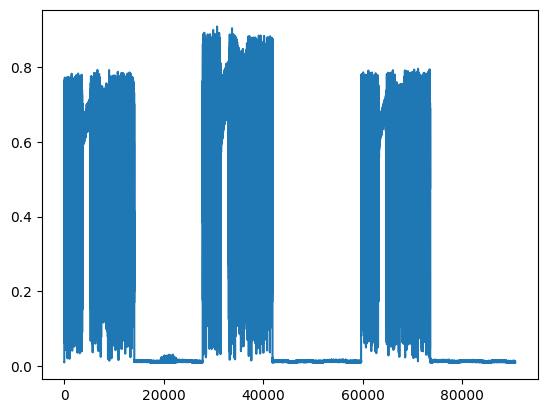

In [23]:
import uhd
import numpy as np
import matplotlib.pyplot as plt
import threading
import time

usrp = uhd.usrp.MultiUSRP()

num_samps = 100000000 # number of samples received
samples = np.zeros(num_samps, dtype=np.complex64)
center_freq = 2.41e9 # Hz
sample_rate = 50e6 # Hz
gain = 10 # dB

usrp.set_rx_rate(sample_rate, 0)
usrp.set_rx_freq(uhd.libpyuhd.types.tune_request(center_freq), 0)
usrp.set_rx_gain(gain, 0)

def rx_thread():
    global samples
    # Set up the stream and receive buffer
    st_args = uhd.usrp.StreamArgs("fc32", "sc16")
    st_args.channels = [0]
    metadata = uhd.types.RXMetadata()
    streamer = usrp.get_rx_stream(st_args)
    recv_buffer = np.zeros((1, 1000), dtype=np.complex64)

    # Start Stream
    stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.start_cont)
    stream_cmd.stream_now = True
    streamer.issue_stream_cmd(stream_cmd)

    # Receive Samples

    for i in range(num_samps//1000):
        streamer.recv(recv_buffer, metadata)
        samples[i*1000:(i+1)*1000] = recv_buffer[0]

    # Stop Stream
    stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.stop_cont)
    streamer.issue_stream_cmd(stream_cmd)




def tx_thread():
    global sample_rate
    samples = 0.1*np.random.randn(1000000) + 0.1j*np.random.randn(1000000) # create random signal
    square = np.sign(np.sin(np.linspace(0, 2*np.pi, 1000000)))*.5+.5
    samples = samples*square
    samples = samples.astype(np.complex64)

    duration = 1 # seconds
    center_freq = [2.44e9]
    gain = 90 # [dB] start low then work your way up
    for i in range(4):
        for freq in center_freq:
            usrp.send_waveform(samples, duration, freq, sample_rate, [0], gain)
            # time.sleep(.1)

rx_thread = threading.Thread(target=rx_thread)
tx_thread = threading.Thread(target=tx_thread)

rx_thread.start()
# tx_thread.start()

rx_thread.join()
# tx_thread.join()

samples = samples[samples>0.01]
#np.fft.fft
plt.plot(np.abs(samples))
plt.show()


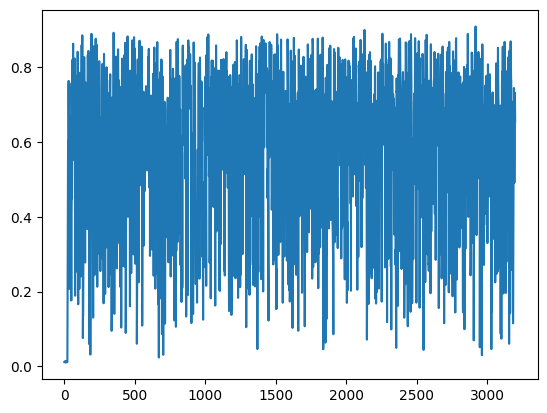

In [58]:

#np.fft.fft
plt.plot(np.abs((samples[27800:31000])))   
plt.show()

x= samples[27800:31000]

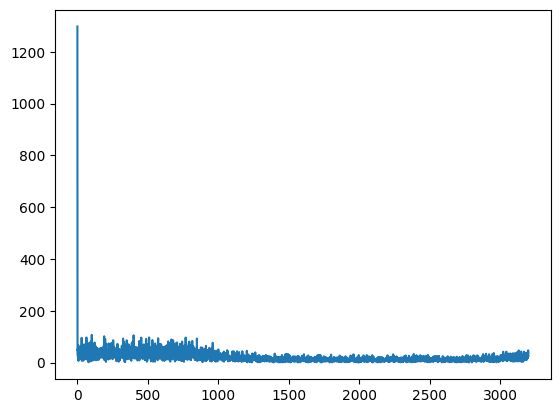

: 

In [61]:
# colors = plt.cm.Blues(np.linspace(0.4, 1, len(x)//2))
# plt.plot(np.real(x), np.imag(x), '.')
plt.plot(np.abs(np.fft.fft(x)))

Important Warning: (scalePhaseGradientToHz) No sampling frequency specified, using default Fs of 10.0Msps.
IMPORTANT WARNING: (bitFinderFromPhaseGradient) No sampling frequency specified, using default Fs of 10.0Msps.


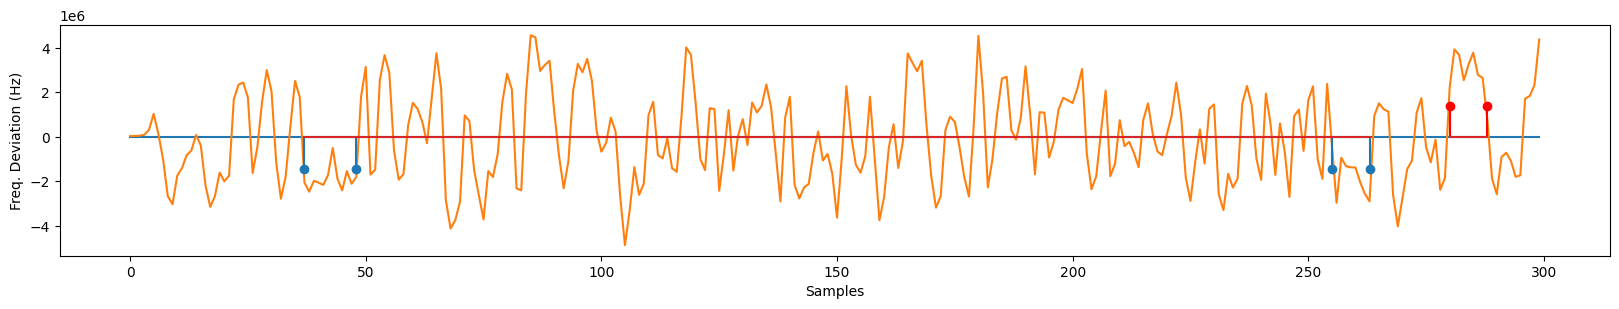

In [ ]:
import IQ

iq = IQ.IQ(Fc= center_freq-5e3, Fs=sample_rate)

x = iq.apply(methods={

iq.bitFinderFromPhaseGradient: {'plot': True},
iq.scalePhaseGradientToHz: None,
iq.gradient: None,
iq.unwrapPhase: None,
iq.phase: None,
iq.butter: {"cutoff": 4e6},
iq.demodulate: None
},frame=samples[387600+3800:397600-3330][0:300])